In [ ]:
from tensorflow.keras.datasets.mnist import load_data
(x_train, y_train), (x_test, y_test) = load_data(path='mnist.npz')

In [ ]:
print('#######훈련데이터#######\n',x_train.shape, y_train.shape)
print(y_train)

print('\n')

print('#######테스트데이터#######\n',x_test.shape, y_test.shape)
print(y_test)ㄴ

#######훈련데이터#######
 (60000, 28, 28) (60000,)
[5 0 4 ... 5 6 8]


#######테스트데이터#######
 (10000, 28, 28) (10000,)
[7 2 1 ... 4 5 6]


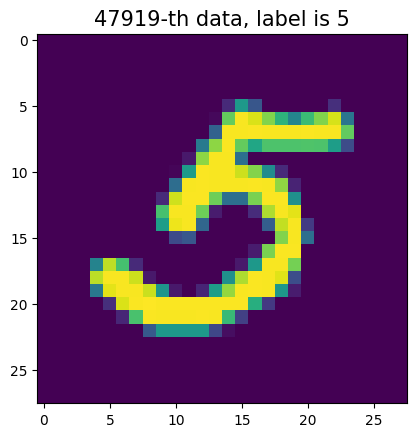

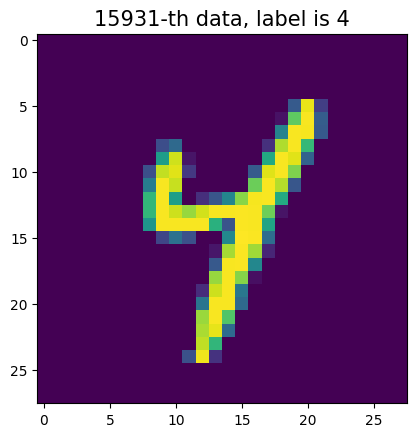

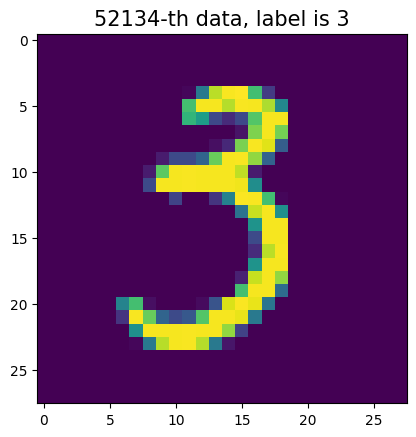

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(777)

sample_size = 3

random_idx = np.random.randint(60000, size = sample_size)

for idx in random_idx:
    img = x_train[idx,:]
    label = y_train[idx]
    plt.figure()
    plt.imshow(img)
    plt.title(f'{idx}-th data, label is {label}',
              fontsize = 15)

plt.show()

Text(0.5, 1.0, '52134-th test data, label is 5')

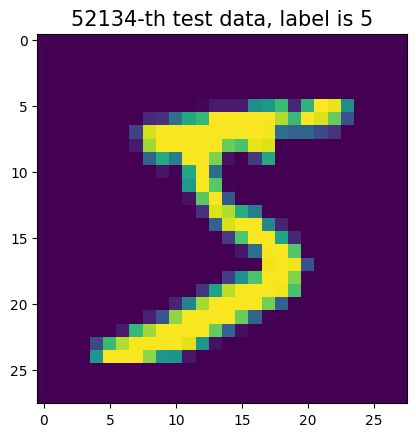

In [ ]:
img = x_train[0,:]
label = y_train[0]
plt.figure()
plt.imshow(img)
plt.title(f'{idx}-th test data, label is {label}',
              fontsize = 15)

In [ ]:
for i in x_train[4]:
  for j in i:
    print(f'{j:4}', end="")
  print('\n')

   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0

   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0

   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0

   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0

   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0

   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0

   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0

   0   0   0   0   0   0   0   0   0   0   0   0  55 148 210 253 253 113  87 148  55   0   0   0   0   0   0   0

   0   0   0   0   0   0   0   0   0   0   0  87 232 252 253 189 210 252 252 253 168   0

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3, random_state=777)

print(f'훈련 데이터:{x_train.shape}, 레이블:{y_train.shape}')
print(f'검증 데이터:{x_val.shape}, 레이블:{y_val.shape}')

훈련 데이터:(42000, 28, 28), 레이블:(42000,)
검증 데이터:(18000, 28, 28), 레이블:(18000,)


In [ ]:
num_x_train = x_train.shape[0]
num_x_val = x_val.shape[0]
num_x_test = x_test.shape[0]

x_train = (x_train.reshape((num_x_train, 28*28))) / 255
x_val = (x_val.reshape((num_x_val, 28*28))) / 255
x_test = (x_test.reshape((num_x_test, 28*28))) / 255

print(x_train.shape)

(42000, 784)


In [ ]:
# 다중분류에서 출력층의 뉴런의 수는 클래스의 수와 동일 해야함

from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

print(y_train)

[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
def softmax(arr):
  m = np.max(arr)
  arr = arr - m
  arr = np.exp(arr)
  return arr / np.sum(arr)

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

case_1 = np.array([3.1, 3.0, 2.9])
case_2 = np.array([2.0, 1.0, 0.7])

np.set_printoptions(precision=3)
print(f'sigmoid {sigmoid(case_1)}, softmax {softmax(case_1)}')
print(f'sigmoid {sigmoid(case_2)}, softmax {softmax(case_2)}')



sigmoid [0.957 0.953 0.948], softmax [0.367 0.332 0.301]
sigmoid [0.881 0.731 0.668], softmax [0.61  0.224 0.166]


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(784,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

In [ ]:
history = model.fit(x_train, y_train,
                    epochs=30,
                    batch_size=128,
                    validation_data=(x_val, y_val))

Epoch 1/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - acc: 0.7371 - loss: 0.9182 - val_acc: 0.9346 - val_loss: 0.2401
Epoch 2/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - acc: 0.9377 - loss: 0.2188 - val_acc: 0.9480 - val_loss: 0.1857
Epoch 3/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - acc: 0.9535 - loss: 0.1601 - val_acc: 0.9556 - val_loss: 0.1550
Epoch 4/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.9629 - loss: 0.1285 - val_acc: 0.9599 - val_loss: 0.1389
Epoch 5/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - acc: 0.9693 - loss: 0.1078 - val_acc: 0.9621 - val_loss: 0.1298
Epoch 6/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - acc: 0.9736 - loss: 0.0938 - val_acc: 0.9658 - val_loss: 0.1196
Epoch 7/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - acc: 0.9774 - loss: 0.0775 - val_acc: 0.9682 - val_loss: 0.1137
Epoch 8/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.9791 - loss: 0.0691 - val_acc: 0.9674 - val_loss: 0.1119
Epoch 9/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - ac

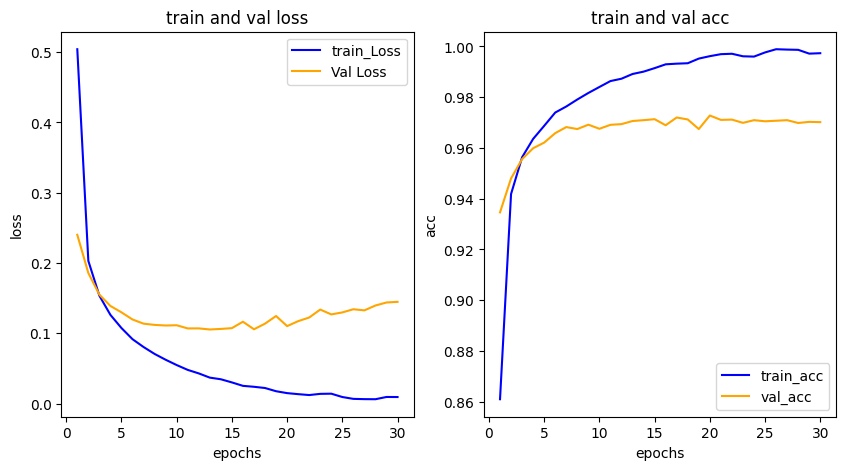

In [ ]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(10, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color='blue', label='train_Loss')
ax1.plot(epochs, val_loss, color='orange', label='Val Loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color='blue', label='train_acc')
ax2.plot(epochs, val_acc, color='orange', label='val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()

In [ ]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - acc: 0.9662 - loss: 0.1747


[0.15595170855522156, 0.970300018787384]

In [ ]:
import numpy as np

results = model.predict(x_test)
print(results.shape)
np.set_printoptions(precision=7)
print(f'각 클래스에 속할 확률 : \n{results[0]}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
(10000, 10)
각 클래스에 속할 확률 : 
[3.6160592e-11 6.0941263e-14 1.1857682e-11 1.4250439e-04 5.8191604e-14
 1.3188433e-09 7.1319777e-17 9.9985647e-01 8.4733441e-13 9.8119369e-07]


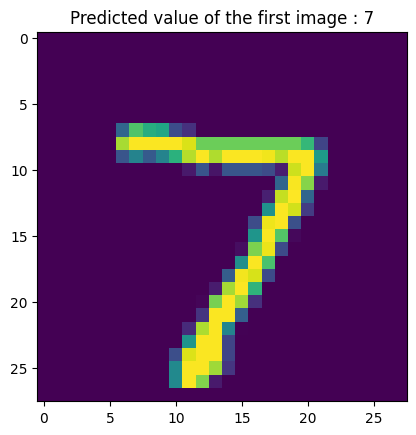

In [ ]:
import matplotlib.pyplot as plt

arg_results = np.argmax(results, axis= -1)
plt.imshow(x_test[0].reshape(28, 28))
plt.title('Predicted value of the first image : ' + str(arg_results[0]))
plt.show()

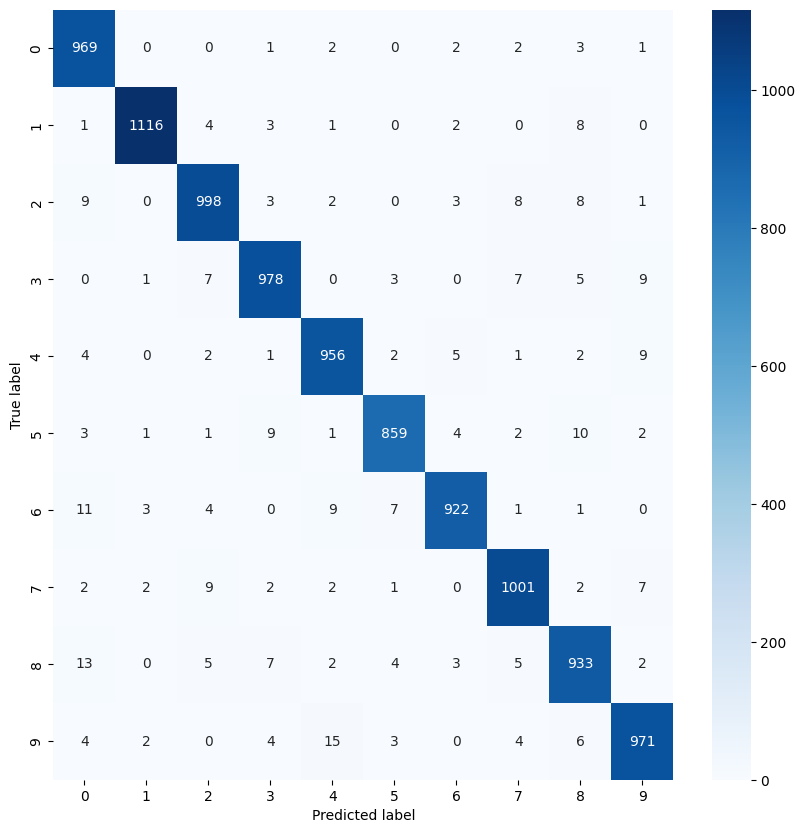

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 10))
cm = confusion_matrix(np.argmax(y_test, axis= -1), np.argmax(results, axis = -1))
sns.heatmap(cm, annot=True, fmt='d', cmap = 'Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [ ]:
from tensorflow.keras.datasets.fashion_mnist import load_data
(x_train, y_train), (x_test, y_test) = load_data()
print(x_train.shape, x_test.shape)

(60000, 28, 28) (10000, 28, 28)


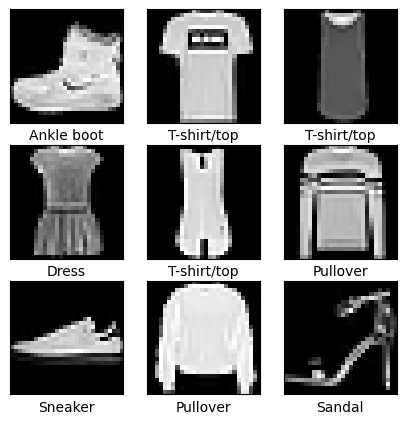

In [ ]:

import matplotlib.pyplot as plt
import numpy as np
np.random.seed(777)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

sample_size = 9
random_idx = np.random.randint(60000, size = sample_size)

plt.figure(figsize=(5, 5))
for i, idx in enumerate(random_idx):
    plt.subplot(3, 3, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap= 'gray')
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [ ]:

x_train = x_train / 255
x_test = x_test / 255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size= 0.3, random_state=777)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

first_model = Sequential()
first_model.add(Flatten(input_shape=(28, 28)))
first_model.add(Dense(64, activation='relu'))
first_model.add(Dense(32, activation='relu'))
first_model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
first_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
first_history = first_model.fit(x_train, y_train,
                                epochs = 30,
                                batch_size = 128,
                                validation_data = (x_val, y_val))

Epoch 1/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - acc: 0.6854 - loss: 0.9585 - val_acc: 0.8412 - val_loss: 0.4671
Epoch 2/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - acc: 0.8364 - loss: 0.4667 - val_acc: 0.8522 - val_loss: 0.4256
Epoch 3/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - acc: 0.8603 - loss: 0.3985 - val_acc: 0.8609 - val_loss: 0.3959
Epoch 4/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - acc: 0.8639 - loss: 0.3780 - val_acc: 0.8712 - val_loss: 0.3639
Epoch 5/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.8753 - loss: 0.3483 - val_acc: 0.8670 - val_loss: 0.3677
Epoch 6/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.8764 - loss: 0.3452 - val_acc: 0.8684 - val_loss: 0.3611
Epoch 7/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.8795 - loss: 0.3307 - val_acc: 0.8774 - val_loss: 0.3474
Epoch 8/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.8896 - loss: 0.3057 - val_acc: 0.8776 - val_loss: 0.3443
Epoch 9/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - ac

In [ ]:
second_model = Sequential()

second_model.add(Flatten(input_shape=(28, 28)))

second_model.add(Dense(128, activation='relu'))

second_model.add(Dense(128, activation='relu'))

second_model.add(Dense(32, activation='relu'))

second_model.add(Dense(10, activation='softmax'))


second_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

second_history = second_model.fit(x_train, y_train,
                                  epochs = 30,
                                  batch_size = 128,
                                  validation_data = (x_val, y_val))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - acc: 0.6885 - loss: 0.9055 - val_acc: 0.8340 - val_loss: 0.4658
Epoch 2/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - acc: 0.8471 - loss: 0.4294 - val_acc: 0.8553 - val_loss: 0.4042
Epoch 3/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - acc: 0.8638 - loss: 0.3767 - val_acc: 0.8653 - val_loss: 0.3781
Epoch 4/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - acc: 0.8723 - loss: 0.3539 - val_acc: 0.8761 - val_loss: 0.3479
Epoch 5/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - acc: 0.8821 - loss: 0.3222 - val_acc: 0.8767 - val_loss: 0.3438
Epoch 6/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - acc: 0.8889 - loss: 0.2999 - val_acc: 0.8732 - val_loss: 0.3479
Epoch 7/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - acc: 0.8906 - loss: 0.2949 - val_acc: 0.8856 - val_loss: 0.3224
Epoch 8/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - acc: 0.8979 - loss: 0.2773 - val_acc: 0.8855 - val_loss: 0.3217
Epoch 9/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - 

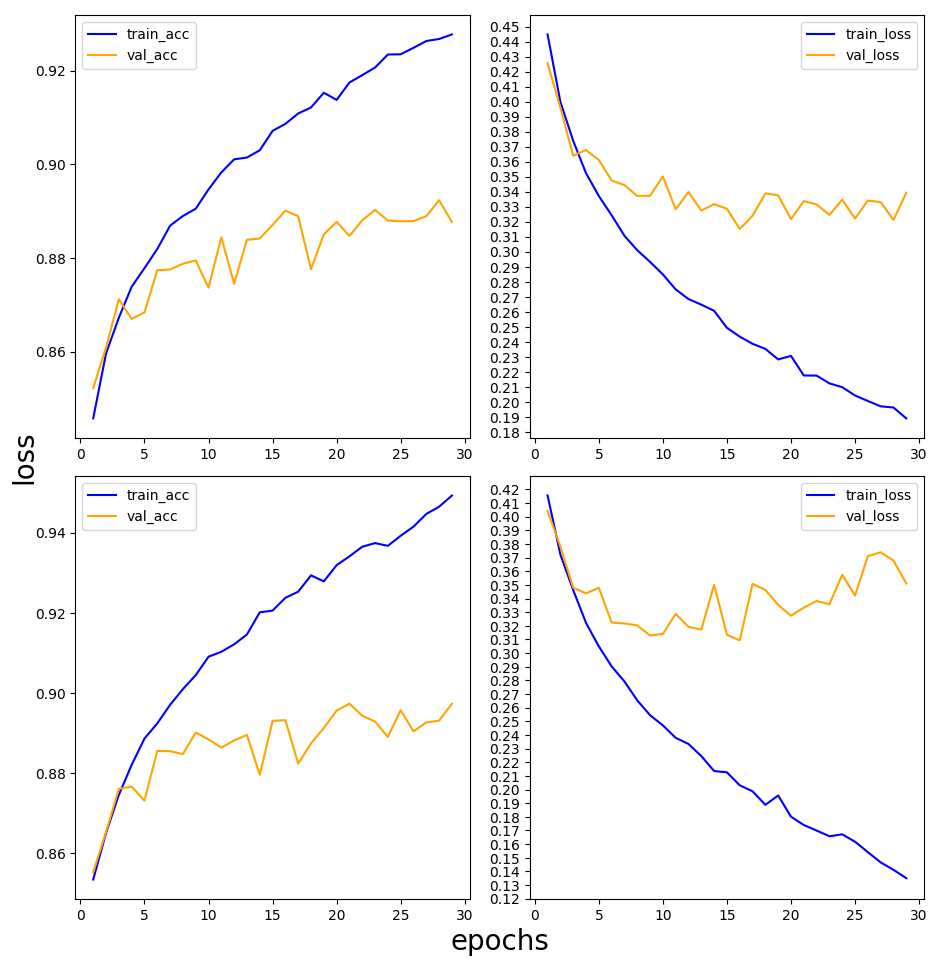

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def draw_loss_acc(history_1, history_2, epochs):
    his_dict_1 = history_1.history
    his_dict_2 = history_2.history
    keys = list(his_dict_1.keys())

    epochs = range(1, epochs)
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(1, 1, 1)

    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

    for i in range(len(his_dict_1)):
        temp_ax = fig.add_subplot(2, 2, i+1)
        temp = keys[i%2]
        val_temp = keys[(i+2)%2 + 2]
        temp_history = his_dict_1 if i < 2 else his_dict_2
        temp_ax.plot(epochs, temp_history[temp][1:],color = 'blue', label= 'train_' + temp)
        temp_ax.plot(epochs, temp_history[val_temp][1:], color = 'orange', label= val_temp)
        if(i == 1 or i == 3):
            start, end = temp_ax.get_ylim()
            temp_ax.yaxis.set_ticks(np.arange(np.round(start,2), end, 0.01))
        temp_ax.legend()
    ax.set_ylabel('loss', size = 20)
    ax.set_xlabel('epochs', size = 20)
    plt.tight_layout()
    plt.show()

draw_loss_acc(first_history, second_history, 30)


ValueError: Exception encountered when calling Sequential.call().

[1mCannot take the length of shape with unknown rank.[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=<unknown>, dtype=float32)
  • training=False
  • mask=None